In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("HR_comma_sep.csv")
# df.head()
# df.shape
# df.info()
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


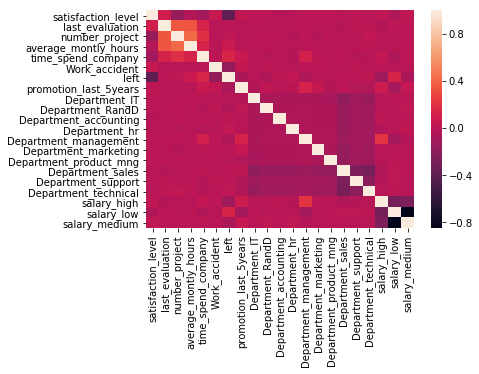

In [19]:
# df.salary = df.salary.replace(["low", "medium", "high"], [0,1,2])
import numpy as np
df = pd.get_dummies(df)
df.head()
import seaborn as sn
cor = df.corr()
# cor = np.abs(cor)
# print(cor)
sn.heatmap(cor)

In [22]:
tm = df.groupby("left").mean()
# print(df.columns)
# tm
# df.groupby("left")["time_spend_company"].describe()
df.groupby("left")["average_montly_hours"].describe()
# tm

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,199.060203,45.682731,96.0,162.0,198.0,238.0,287.0
1,3571.0,207.419210,61.202825,126.0,146.0,224.0,262.0,310.0


In [23]:
v1 = tm.iloc[0,:]
v2 = tm.iloc[1,:]
abs((v1-v2)/(v1+v2))

satisfaction_level        0.204815
last_evaluation           0.001841
number_project            0.009008
average_montly_hours      0.020564
time_spend_company        0.068417
Work_accident             0.574284
promotion_last_5years     0.662952
salary                    0.221658
Department_IT             0.043957
Department_RandD          0.264685
Department_accounting     0.073896
Department_hr             0.135348
Department_management     0.298450
Department_marketing      0.004104
Department_product_mng    0.052597
Department_sales          0.018683
Department_support        0.029600
Department_technical      0.048796
dtype: float64

In [26]:
df = pd.read_csv("HR_comma_sep.csv")
# pd.crosstab(df.salary, df.left).plot(kind='bar')
pd.crosstab(df.Department, df.left, normalize=True, margins=True) #requested by abhijit #not kaam ka like him
# pd.crosstab(df.Department, df.left, normalize=0, margins=True)

left,0,1,All
Department,,,
IT,0.063604,0.018201,0.081805
RandD,0.044403,0.008067,0.052470
accounting,0.037536,0.013601,0.051137
hr,0.034936,0.014334,0.049270
management,0.035936,0.006067,0.042003
marketing,0.043670,0.013534,0.057204
product_mng,0.046936,0.013201,0.060137
sales,0.208414,0.067605,0.276018
support,0.111607,0.037002,0.148610


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
df = pd.read_csv("HR_comma_sep.csv")
df.drop(['last_evaluation', 'number_project'], axis='columns', inplace=True)
df["salary"].replace(["low", "medium", "high"], [0,1,2], inplace=True)
df = pd.get_dummies(df)
from sklearn.model_selection import train_test_split
#model = LogisticRegression()
model = RandomForestClassifier()
#model = XGBClassifier()

#from sklearn.svm import SVC
#model = SVC()

y = df["left"]
df.drop("left", axis="columns", inplace=True)
X = df

X["average_montly_hours"] = pd.cut(X["average_montly_hours"], bins=[0,150,200,1000], labels=[2,1,3])
X["time_spend_company"] = pd.cut(X["time_spend_company"], bins=[0,2,5, 1000], labels=[3,2,1])

X["average_montly_hours"] = X["average_montly_hours"].astype('int64') 
X["time_spend_company"] = X["time_spend_company"].astype('int64') 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model.fit(X_train, y_train)

print(model.score(X_test,y_test))
from sklearn.metrics import confusion_matrix
yp = model.predict(X_test)
print("left", sum(yp!=0))
print("not left", sum(yp==0))
accuracy_score(y_test, yp)
#cm = confusion_matrix(y_test, yp)
# import seaborn as sn
# sn.heatmap(cm , annot=True)
cm

0.9316666666666666
left 720
not left 2280


array([[2171,   99],
       [ 115,  615]])